# Домашнее задание по лекции Использование pandas и numpy для очистки данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## загрузка данных

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
# Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Целевая переменная ’MEDV’.

### Функции для построения линейной регрессии

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def linear_regr_errors(x, y):
    """
    Ф-ция строит линейную регрессионную модель по вдодным данным x, y, 
    предварительно разбив данные на тренировочные и тестовые
    Возвращает словарь с ошибками
    """
    errors={}
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

    regr = LinearRegression()
    # regression_model = GridSearchCV(estimator, grid_params, cv=5, n_jobs=-1, verbose=1)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
#     print("R2: \t", r2_score(y_test, y_pred))
#     print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
#     print("MAE: \t", mean_absolute_error(y_test, y_pred))
    errors['R2']= r2_score(y_test, y_pred)
    errors['RMSE'] = sqrt(mean_squared_error(y_test, y_pred))
    errors['MAE'] = mean_absolute_error(y_test, y_pred)
    return errors

In [5]:
def linear_regr_stats(x, y, n=10):
    """
    Ф-ция по входным данным x, y строит n раз регрессионную модель
    Вывод на экран: 
    - усредненные ошибки (арифметическое среднее по n)
    - ошибки в графическом виде 
    """
    error_df = pd.DataFrame()
    for i in range(n):
        error_df=error_df.append(linear_regr_errors(x,y), ignore_index=True)
    print(f'Ошибки по {n} моделям:\n', error_df.mean())
    
    fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
    for i, er in enumerate(error_df.columns):
        ax[i].scatter(error_df.index,error_df[er])
        ax[i].set_title(er)
        ax[i].set_xlabel('index')
        ax[i].plot([0,n], [error_df[er].mean(), error_df[er].mean()])    

## Осмотр данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
data.isna().sum().sum()

0

506 строк, все заполнены (без NaN)

Ощущения: малова то данных

In [8]:
# названия столбцов - в нижнем регистре - для удобства:
data.columns = data.columns.str.lower()  
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- CRIM, ZN - максималаьное значение сильно больше третьего квантиля - вероятно выбросы
- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E758C54148>,
      dtype=object)

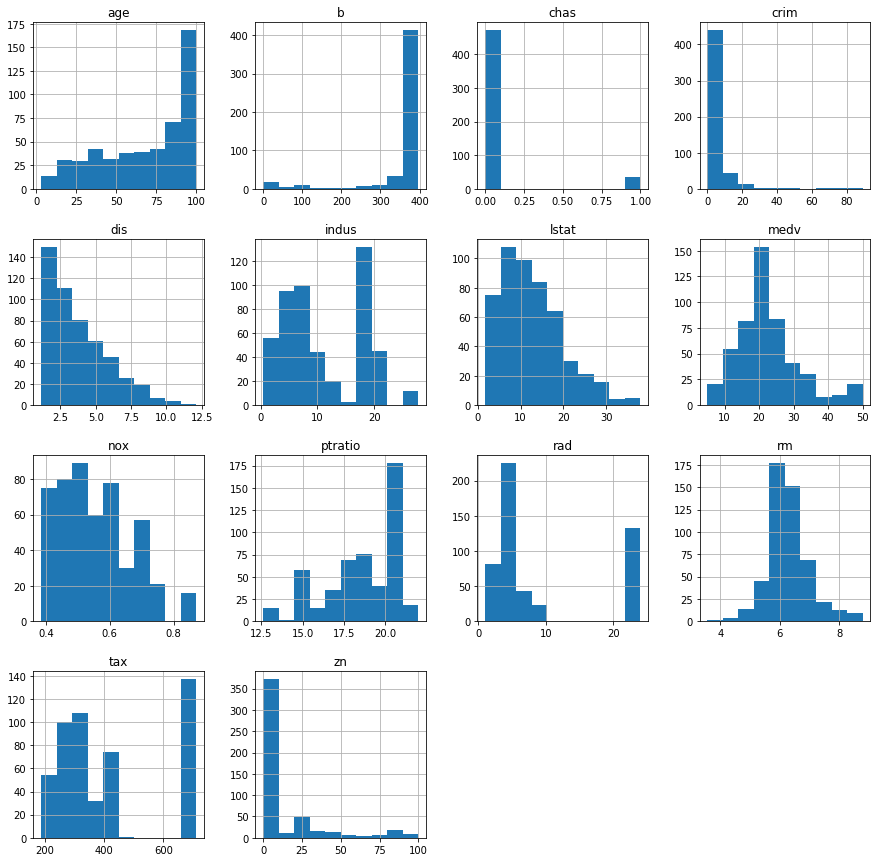

In [10]:
data.hist(figsize=(15,15))

### модель0 - на исходных данных без обработки

Ошибки по 30 моделям:
 MAE     3.463645
R2      0.710449
RMSE    4.952083
dtype: float64


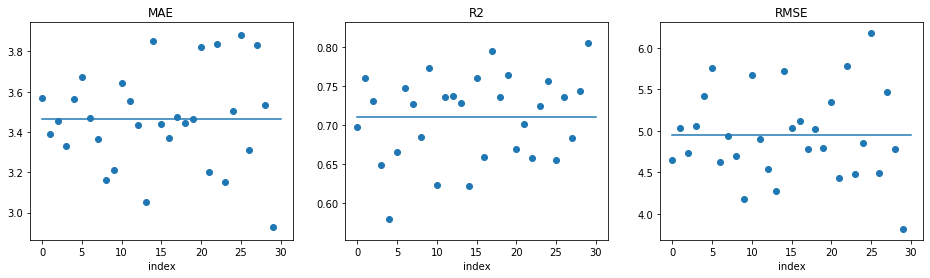

In [11]:
x = data.drop('medv', axis=1)
x.head()
y = data.medv
linear_regr_stats(x,y, 30)

## борьба с выбросами

*На исходных данных R2 = 0.65..0.75*

25.021659999999994

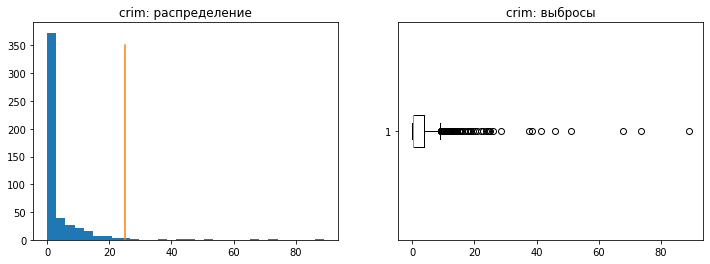

In [12]:
# crim
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
ax0.hist(data.crim, bins=30)
ax1.boxplot(data.crim, vert=False)
ax0.set_title('crim: распределение')
ax1.set_title('crim: выбросы')
q=data.crim.quantile(0.98)
ax0.plot([q,q],[0,350])
q

В 98% данных уровень преступности не более 25. Обрезать все большее

In [13]:
data[data.crim < data.crim.quantile(0.98)].shape

(495, 14)

80.0

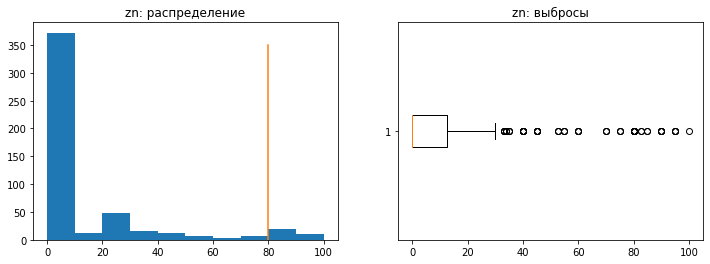

In [14]:
# zm
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
ax0.hist(data.zn)
ax1.boxplot(data.zn, vert=False)
ax0.set_title('zn: распределение')
ax1.set_title('zn: выбросы')
q=data.zn.quantile(0.95)
ax0.plot([q,q],[0,350])
q

In [15]:
values=data.zn.value_counts()
print(data.zn.describe())

values.sort_index()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64


0.0      372
12.5      10
17.5       1
18.0       1
20.0      21
21.0       4
22.0      10
25.0      10
28.0       3
30.0       6
33.0       4
34.0       3
35.0       3
40.0       7
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      15
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
Name: zn, dtype: int64

Городов с плотной застройкой жилыми домами (более 80%) не так уж много.

Городов с промежуточными вариантами застройки тоже.

Т.е. можно разделить на категории, например - 0...25% (мало), 25..50% (средне), 50..100% (много = плотная жилая застройка).

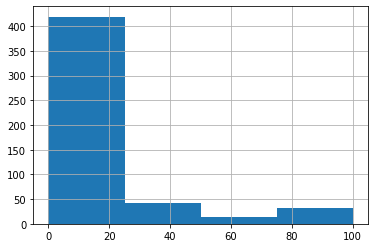

In [16]:
data.zn.hist(bins=4)

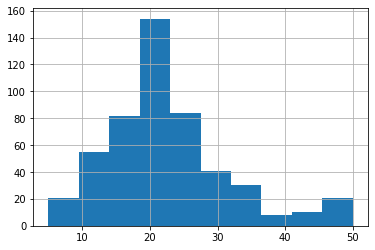

In [17]:
data.medv.hist()
data[data.medv > 40].shape
data.medv.describe()
data = data[data.medv <=40]

Среди цен есть категория относительно дорогого жилья. Эту часть можно выделить в отдельный класс и исследовать отдельно.
Пока - просто "отрезать".

### есть ли корреляция между параметрами?

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
max,0.63,0.68,0.77,0.09,0.77,0.60,0.73,0.68,0.91,0.91,0.45,0.39,0.64,0.60
min,-0.49,-0.57,-0.72,-0.12,-0.77,-0.59,-0.74,-0.77,-0.51,-0.60,-0.48,-0.45,-0.78,-0.78


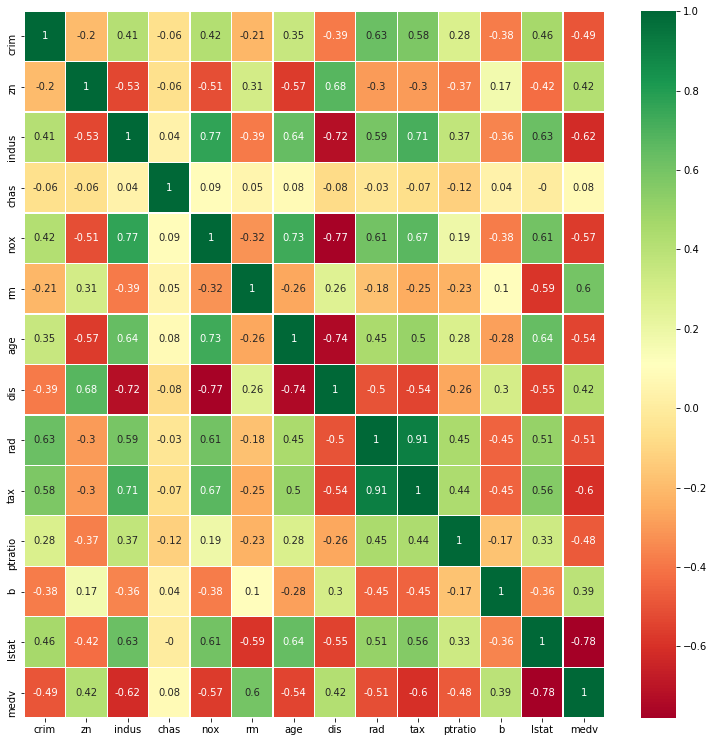

In [18]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)
corr[corr!=1].apply([max, min])

### модель 2

,crim,zn,chas,nox,rm,tax,ptratio,b,lstat
0,0.00632,18.0,0,0.538,6.575,296,15.3,396.90,4.98
1,0.02731,0.0,0,0.469,6.421,242,17.8,396.90,9.14
2,0.02729,0.0,0,0.469,7.185,242,17.8,392.83,4.03
3,0.03237,0.0,0,0.458,6.998,222,18.7,394.63,2.94
4,0.06905,0.0,0,0.458,7.147,222,18.7,396.90,5.33


Ошибки по 30 моделям:
 MAE     2.773997
R2      0.704613
RMSE    3.697913
dtype: float64


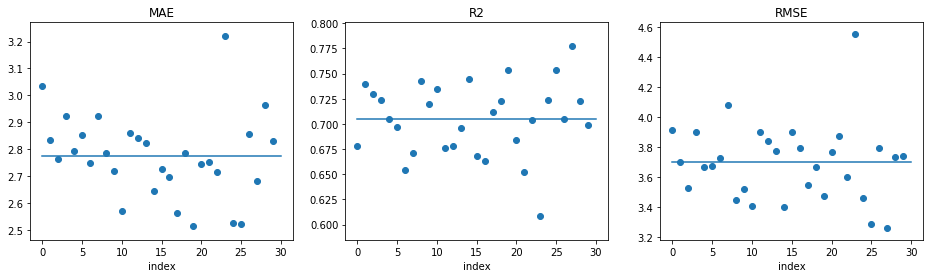

In [19]:
# x = data.drop(['medv','tax'], axis=1)
data.drop(['rad','dis','indus','age'], axis=1, inplace=True)
x = data.drop(['medv'], axis=1)
display(x.head())
y = data.medv
linear_regr_stats(x,y, 30)

Лучше не стало :(

### нормализовать данные

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_norm = pd.DataFrame(min_max_scaler.fit_transform(data))
data_norm.columns = list(data.columns.values)
data_norm.describe()

,crim,zn,chas,nox,rm,tax,ptratio,b,lstat,medv
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,0.042054,0.106432,0.058947,0.351972,0.504827,0.429164,0.639261,0.894126,0.311956,0.457084
std,0.099345,0.222890,0.235774,0.241154,0.113994,0.322549,0.218546,0.236830,0.194675,0.195369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000857,0.000000,0.000000,0.135802,0.443667,0.182252,0.510638,0.944047,0.157127,0.330460
50%,0.002638,0.000000,0.000000,0.314815,0.499329,0.280534,0.691489,0.987619,0.279244,0.448276
75%,0.041920,0.125000,0.000000,0.491770,0.569170,0.914122,0.808511,1.000000,0.422895,0.554598
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
### модель 3

Ошибки по 30 моделям:
 MAE     2.756116
R2      0.718990
RMSE    3.614989
dtype: float64


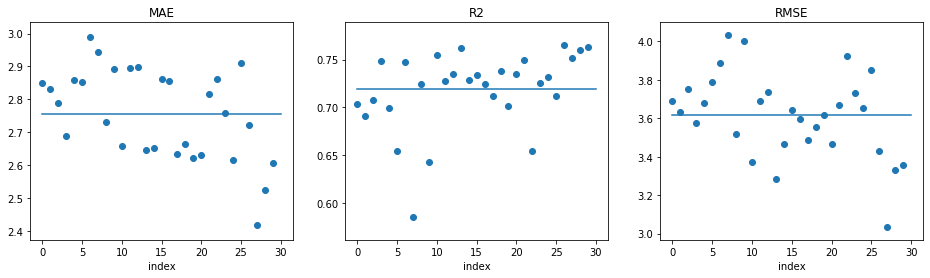

In [27]:
x = data.drop(['medv'], axis=1)
y = data.medv
linear_regr_stats(x,y, 30)

Повышать точность модели дальше можно большей зачисткой данных - исключением "выбросов"?

Ошибки по 30 моделям:
 MAE     2.779545
R2      0.704029
RMSE    3.649404
dtype: float64


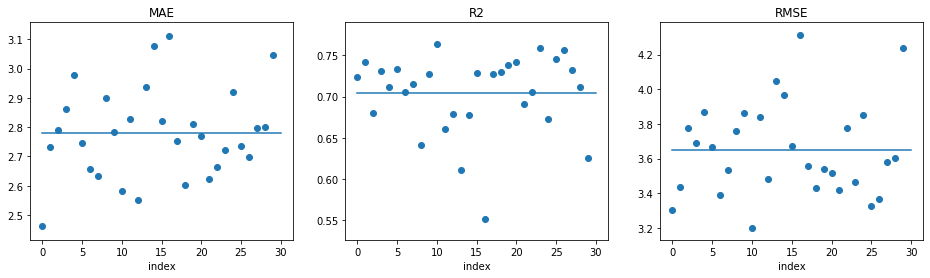

In [28]:
x = data.drop(['medv','b'], axis=1)
y = data.medv
linear_regr_stats(x,y, 30)